In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist
from keras.preprocessing import image
from keras.metrics import categorical_accuracy

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [3]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
(X_train.shape, Y_train.shape, Y_test.shape, Y_test.shape)

((60000, 28, 28), (60000,), (10000,), (10000,))

In [4]:
#Need to insert a dimension for keras to work properly
X_test = np.expand_dims(X_test,1)
X_train = np.expand_dims(X_train,1)

In [5]:
#X_test = np.expand_dims(X_test,3)
#X_train = np.expand_dims(X_train,3)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [8]:
(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

((60000, 1, 28, 28), (60000, 10), (10000, 1, 28, 28), (10000, 10))

# Linear model

In [17]:
lm=Sequential()
lm.add(Lambda(lambda x:x,input_shape=(1,28,28)))
lm.add(Flatten())
lm.add(Dense(10,activation='softmax'))

In [18]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 1, 28, 28)     0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 784)           0           lambda_1[0][0]                   
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            7850        flatten_1[0][0]                  
Total params: 7850
____________________________________________________________________________________________________


In [19]:
lm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/engine/topology.py:1656: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "sequential_1_model" was not an Input tensor, it was generated by layer lambda_1.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: lambda_input_1
  str(x.name))


In [20]:
lm.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.4688 - acc: 0.8776     
Epoch 2/10
60000/60000 [==============================] - 4s - loss: 0.3036 - acc: 0.9155     
Epoch 3/10
60000/60000 [==============================] - 4s - loss: 0.2834 - acc: 0.9209     
Epoch 4/10
60000/60000 [==============================] - 4s - loss: 0.2730 - acc: 0.9239     
Epoch 5/10
60000/60000 [==============================] - 4s - loss: 0.2662 - acc: 0.9252     
Epoch 6/10
60000/60000 [==============================] - 4s - loss: 0.2620 - acc: 0.9270     
Epoch 7/10
60000/60000 [==============================] - 4s - loss: 0.2580 - acc: 0.9286     
Epoch 8/10
60000/60000 [==============================] - 4s - loss: 0.2550 - acc: 0.9294     
Epoch 9/10
60000/60000 [==============================] - 4s - loss: 0.2532 - acc: 0.9294     
Epoch 10/10
60000/60000 [==============================] - 4s - loss: 0.2503 - acc: 0.9306     


# single dense layer

In [21]:
fc=Sequential()
fc.add(Lambda(lambda x:x,input_shape=(1,28,28)))
fc.add(Flatten())
fc.add(Dense(512,activation='relu'))
fc.add(Dense(10,activation='softmax'))

In [22]:
fc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/engine/topology.py:1656: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "sequential_2_model" was not an Input tensor, it was generated by layer lambda_2.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: lambda_input_2
  str(x.name))


In [23]:
fc.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 1, 28, 28)     0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 784)           0           lambda_2[0][0]                   
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 512)           401920      flatten_2[0][0]                  
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 10)            5130        dense_2[0][0]                    
Total params: 407050
______________________________________________________________________

In [24]:
fc.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 6s - loss: 0.1998 - acc: 0.9413     


In [25]:
fc.optimizer.lr=0.1

In [27]:
fc.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 6s - loss: 0.0813 - acc: 0.9746     


In [28]:
fc.optimizer.lr=0.01

In [30]:
fc.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 6s - loss: 0.0517 - acc: 0.9834     


# VGG-style CNN network

In [37]:
model=Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D())
model.add(Convolution2D(50, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [38]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_2 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 32, 13, 13)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 50, 11, 11)    14450       maxpooling2d_2[0][0]             
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 50, 5, 5)      0           convolution2d_3[0][0]            
___________________________________________________________________________________________

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 14s - loss: 0.1189 - acc: 0.9625    


In [41]:
model.optimizer.lr=0.1

In [42]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 14s - loss: 0.0403 - acc: 0.9875    


In [43]:
model.optimizer.lr=0.01

In [44]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 14s - loss: 0.0266 - acc: 0.9915    


In [45]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 14s - loss: 0.0195 - acc: 0.9938    


# Creating CNN from scratch, Howard style

In [48]:
from keras.preprocessing import image

In [49]:
#find an integer number for the batch_size that could divide both of nb_train_samples and nb_validation_samples
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, Y_train, batch_size=50)
test_batches = gen.flow(X_test, Y_test, batch_size=50, shuffle=False)

In [50]:
model=Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D())
model.add(Convolution2D(50, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.fit_generator(batches, batches.N, nb_epoch=1,validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 17s - loss: 0.1301 - acc: 0.9596 - val_loss: 0.0383 - val_acc: 0.9878


In [35]:
model.optimizer.lr=0.1

In [36]:
model.fit_generator(batches, batches.N, nb_epoch=2,validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/3
60000/60000 [==============================] - 21s - loss: 0.0412 - acc: 0.9871 - val_loss: 0.0291 - val_acc: 0.9900
Epoch 2/3
60000/60000 [==============================] - 22s - loss: 0.0258 - acc: 0.9921 - val_loss: 0.0286 - val_acc: 0.9903
Epoch 3/3
60000/60000 [==============================] - 21s - loss: 0.0178 - acc: 0.9944 - val_loss: 0.0299 - val_acc: 0.9907


In [37]:
model.optimizer.lr=0.01

In [38]:
model.fit_generator(batches, batches.N, nb_epoch=1,validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 22s - loss: 0.0135 - acc: 0.9956 - val_loss: 0.0331 - val_acc: 0.9895


In [15]:
(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

((60000, 1, 28, 28), (60000, 10), (10000, 1, 28, 28), (10000, 10))

In [66]:
#In order for model.predict_generator to equal model.predict 
# use shuffle=False,
# AND, need to re-generate the test-batches after running the model!
n_samps=100
batch_sizea=7
test_batches_samps= gen.flow(X_test[:n_samps,:,:,:], Y_test[:n_samps,:], batch_size=batch_sizea, shuffle=False)
X_test_samps=X_test[:n_samps,:,:,:]
predicted_batches=model.predict_generator(test_batches_samps, test_batches_samps.N)
predicted_Xtest=model.predict(X_test_samps,batch_size=7)
np.array_equal(predicted_batches,predicted_Xtest)

True

In [68]:
test_batches = gen.flow(X_test, Y_test, batch_size=50, shuffle=False)
#model.fit_generator(batches, batches.N, nb_epoch=1,validation_data=test_batches, nb_val_samples=test_batches.N)
val_predicted = model.predict_generator(test_batches, test_batches.N)
val_predicted2=model.predict(X_test, batch_size=50)
np.array_equal(val_predicted,val_predicted2)

True

In [57]:
categorical_accuracy(Y_test, val_predicted2).eval()

array(0.9878000020980835, dtype=float32)

In [58]:
categorical_accuracy(Y_test, val_predicted).eval()

array(0.9878000020980835, dtype=float32)

# data augmentation

In [1]:
from keras.preprocessing import image

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [11]:
#find an integer number for the batch_size that could divide both of nb_train_samples and nb_validation_samples
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, Y_train, batch_size=50)
test_batches = gen.flow(X_test, Y_test, batch_size=50, shuffle=False)

In [12]:
model=Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D())
model.add(Convolution2D(50, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit_generator(batches, batches.N, nb_epoch=1,validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 18s - loss: 0.2651 - acc: 0.9175 - val_loss: 0.1027 - val_acc: 0.9677


In [15]:
model.optimizer.lr=0.1
model.fit_generator(batches, batches.N, nb_epoch=3,validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/3
60000/60000 [==============================] - 19s - loss: 0.0902 - acc: 0.9708 - val_loss: 0.0883 - val_acc: 0.9728
Epoch 2/3
60000/60000 [==============================] - 18s - loss: 0.0691 - acc: 0.9778 - val_loss: 0.0594 - val_acc: 0.9807
Epoch 3/3
60000/60000 [==============================] - 18s - loss: 0.0566 - acc: 0.9814 - val_loss: 0.0491 - val_acc: 0.9835


In [16]:
model.optimizer.lr=0.01
model.fit_generator(batches, batches.N, nb_epoch=5,validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/5
60000/60000 [==============================] - 19s - loss: 0.0519 - acc: 0.9841 - val_loss: 0.0444 - val_acc: 0.9863
Epoch 2/5
60000/60000 [==============================] - 18s - loss: 0.0457 - acc: 0.9857 - val_loss: 0.0370 - val_acc: 0.9873
Epoch 3/5
60000/60000 [==============================] - 19s - loss: 0.0419 - acc: 0.9870 - val_loss: 0.0354 - val_acc: 0.9893
Epoch 4/5
60000/60000 [==============================] - 19s - loss: 0.0394 - acc: 0.9876 - val_loss: 0.0292 - val_acc: 0.9913
Epoch 5/5
60000/60000 [==============================] - 19s - loss: 0.0374 - acc: 0.9881 - val_loss: 0.0405 - val_acc: 0.9861


# add in batchnorm

In [17]:
#find an integer number for the batch_size that could divide both of nb_train_samples and nb_validation_samples
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, Y_train, batch_size=50)
test_batches = gen.flow(X_test, Y_test, batch_size=50,shuffle=False)

In [22]:
model=Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D())
BatchNormalization(axis=1),
model.add(Convolution2D(50, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D())
model.add(Flatten())
BatchNormalization(axis=1),
model.add(Dense(512,activation='relu'))
BatchNormalization(axis=1),
model.add(Dense(10,activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit_generator(batches, batches.N, nb_epoch=1,validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
60000/60000 [==============================] - 19s - loss: 0.2676 - acc: 0.9154 - val_loss: 0.1184 - val_acc: 0.9628


In [25]:
model.optimizer.lr=0.1
model.fit_generator(batches, batches.N, nb_epoch=3,validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/3
60000/60000 [==============================] - 19s - loss: 0.0965 - acc: 0.9698 - val_loss: 0.0613 - val_acc: 0.9807
Epoch 2/3
60000/60000 [==============================] - 19s - loss: 0.0712 - acc: 0.9779 - val_loss: 0.0536 - val_acc: 0.9829
Epoch 3/3
60000/60000 [==============================] - 19s - loss: 0.0590 - acc: 0.9818 - val_loss: 0.0624 - val_acc: 0.9779


In [26]:
model.optimizer.lr=0.01
model.fit_generator(batches, batches.N, nb_epoch=5,validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/5
60000/60000 [==============================] - 19s - loss: 0.0516 - acc: 0.9834 - val_loss: 0.0464 - val_acc: 0.9851
Epoch 2/5
60000/60000 [==============================] - 18s - loss: 0.0476 - acc: 0.9848 - val_loss: 0.0514 - val_acc: 0.9840
Epoch 3/5
60000/60000 [==============================] - 19s - loss: 0.0437 - acc: 0.9855 - val_loss: 0.0472 - val_acc: 0.9859
Epoch 4/5
60000/60000 [==============================] - 19s - loss: 0.0418 - acc: 0.9872 - val_loss: 0.0484 - val_acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 19s - loss: 0.0385 - acc: 0.9880 - val_loss: 0.0444 - val_acc: 0.9867


# Ensembling

In [ ]:
#find an integer number for the batch_size that could divide both of nb_train_samples and nb_validation_samples
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, Y_train, batch_size=50)
test_batches = gen.flow(X_test, Y_test, batch_size=50,shuffle=False)

In [26]:
def get_model():
    model=Sequential()
    model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
    model.add(MaxPooling2D())
    BatchNormalization(axis=1),
    model.add(Convolution2D(50, 3, 3, activation='relu', input_shape=(1,28,28)))
    model.add(MaxPooling2D())
    model.add(Flatten())
    BatchNormalization(axis=1),
    model.add(Dense(512,activation='relu'))
    BatchNormalization(axis=1),
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
def fit_model():
    print('working')
    model = get_model()
    model.fit_generator(batches, batches.N, nb_epoch=1, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    model.optimizer.lr=0.1
    model.fit_generator(batches, batches.N, nb_epoch=1, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    model.optimizer.lr=0.01
    model.fit_generator(batches, batches.N, nb_epoch=1, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    model.optimizer.lr=0.001
    model.fit_generator(batches, batches.N, nb_epoch=1, verbose=0,
                        validation_data=test_batches, nb_val_samples=test_batches.N)
    return model

In [28]:
models = [fit_model() for i in range(6)]

working
working
working
working
working
working


In [29]:
all_preds = np.stack([m.predict(X_test, batch_size=250) for m in models])

In [32]:
np.shape(all_preds)

(6, 10000, 10)

(array([  5.39036000e+05,   4.24000000e+02,   2.56000000e+02,
          1.92000000e+02,   1.47000000e+02,   1.50000000e+02,
          1.71000000e+02,   2.25000000e+02,   3.56000000e+02,
          5.90430000e+04]),
 array([  1.47518740e-25,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

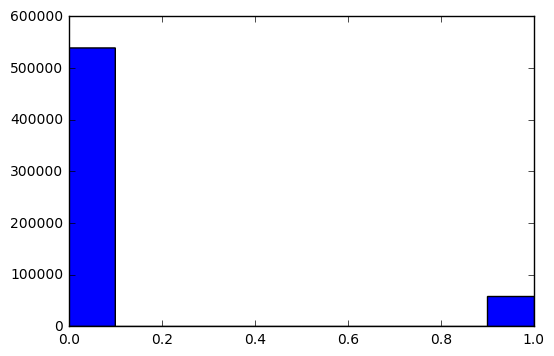

In [41]:
plt.hist(all_preds.flatten())

In [42]:
avg_preds = all_preds.mean(axis=0)

In [43]:
np.shape(avg_preds)

(10000, 10)

(array([  8.97780000e+04,   1.26000000e+02,   4.80000000e+01,
          3.30000000e+01,   3.00000000e+01,   2.70000000e+01,
          2.80000000e+01,   4.80000000e+01,   1.10000000e+02,
          9.77200000e+03]),
 array([  3.13459629e-21,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

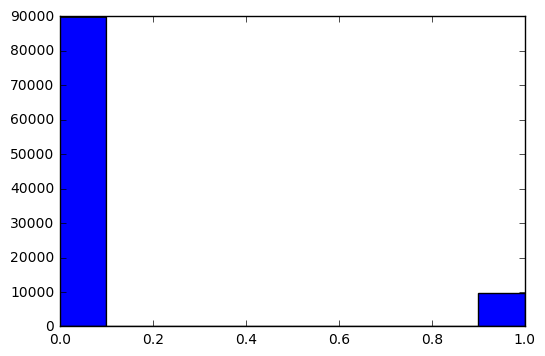

In [44]:
plt.hist(avg_preds.flatten())

In [48]:
categorical_accuracy(Y_test, avg_preds).eval()

array(0.9959999918937683, dtype=float32)